
Election Results
-------------------------
Total Votes: 369,711
-------------------------

County Votes:
Jefferson: 10.5% (38,855)

Denver: 82.8% (306,055)

Arapahoe: 6.7% (24,801)

-----------------------
 Largest county turnout: Denver
-----------------------
Charles Casper Stockham: 23.0% (85,213)

Diana DeGette: 73.8% (272,892)

Raymon Anthony Doane: 3.1% (11,606)

-------------------------
Winner: Diana DeGette
Winning Vote Count: 272,892
Winning Percentage: 73.8%
-------------------------



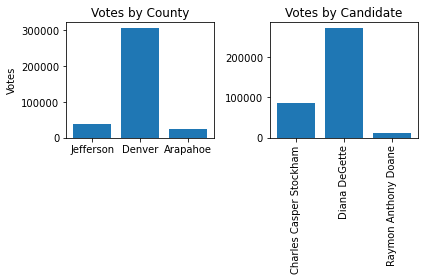

In [125]:
#Challenge 3, PyPoll elections results 

# Add our dependencies.
import csv
import os
import matplotlib.pyplot as plt

# Add a variable to load a file from a path.
file_to_load = os.path.join("Resources", "election_results.csv")

# Add a variable to save the file to a path.
file_to_save = os.path.join("analysis", "election_analysis.txt")

# Initialize a total vote counter.
total_votes = 0

# Candidate Options and candidate votes.
candidate_options = []
candidate_votes = {}

# 1: Create a county list and county votes dictionary.

county_list = []
county_votes ={}

# Track the winning candidate, vote count and percentage
winning_candidate = ""
winning_count = 0
winning_percentage = 0
winning_county_votes = 0 
county_count = 0

#plotting

x = []
y = []


# 2: Track the largest county and county voter turnout.

# Read the csv and convert it into a list of dictionaries
with open(file_to_load) as election_data:
    reader = csv.reader(election_data)

    # Read the header
    header = next(reader)

    # For each row in the CSV file.
    for row in reader:

        # Add to the total vote count
        total_votes = total_votes + 1

        # Get the candidate name from each row.
        candidate_name = row[2]

        # 3: Extract the county name from each row.
        county_name = row[1]
      
        # If the candidate does not match any existing candidate add it to the candidate list
        
        if candidate_name not in candidate_options:

            # Add the candidate name to the candidate list.
            candidate_options.append(candidate_name)

            # And begin tracking that candidate's voter count.
            candidate_votes[candidate_name] = 0

        # Add a vote to that candidate's count
        candidate_votes[candidate_name] += 1

        # 4a: Write a decision statement that checks that the county does not match any existing county in the county list.

        if county_name not in county_list:
                
            # 4b: Add the existing county to the list of counties.
            county_list.append(county_name)

            # 4c: Begin tracking the county's vote count.
            county_votes[county_name] = 0

        # 5: Add a vote to that county's vote count.
        county_votes[county_name] += 1        
        

# Save the results to our text file.
with open(file_to_save, "w") as txt_file:

    # Print the final vote count (to terminal)
    election_results = (
        f"\nElection Results\n"
        f"-------------------------\n"
        f"Total Votes: {total_votes:,}\n"
        f"-------------------------\n\n"
        f"County Votes:\n")
    
    print(election_results, end="")
    
    txt_file.write(election_results)

    # 6a: Write a repetition statement to get the county from the county dictionary.
    # 6b: Retrieve the county vote count.
    
    for county_name in county_votes:
        votes2 = county_votes[county_name]       

        # 6c: Calculate the percent of total votes for the county.

        county_vote_percent = float(votes2) / float(total_votes) * 100
            
         # 6d: Print the county results to the terminal.
                      
        county_results = (f"{county_name}: {county_vote_percent:.1f}% ({votes2:,})\n")
        
        print(county_results)
        
        #6e: save the county results to the text file 
        
        txt_file.write(county_results)
    
        # 6f: Write a decision statement to determine the winning county and get its vote count.
        if (votes2 > county_count):
            county_count = votes2
            winning_county = county_name     
   

    # 7: Print the county with the largest turnout to the terminal.
    
    largest_county_turnout = (
        f"-----------------------\n"
        f" Largest county turnout: {winning_county}\n"
        f"-----------------------\n")
            
    print(largest_county_turnout, end = "")
    
        
    # 8: Save the county with the largest turnout to a text file.
    txt_file.write(largest_county_turnout)
    
      
    # Save the final candidate vote count to the text file.
    for candidate_name in candidate_votes:

        # Retrieve vote count and percentage
        votes = candidate_votes.get(candidate_name)
        vote_percentage = float(votes) / float(total_votes) * 100
        candidate_results = (f"{candidate_name}: {vote_percentage:.1f}% ({votes:,})\n")

        # Print each candidate's voter count and percentage to the terminal.
        
        print(candidate_results)
    
        #  Save the candidate results to our text file.
        txt_file.write(candidate_results)

        # Determine winning vote count, winning percentage, and candidate.
        if (votes > winning_count) and (vote_percentage > winning_percentage):
            winning_count = votes
            winning_candidate = candidate_name
            winning_percentage = vote_percentage

    # Print the winning candidate (to terminal)
    winning_candidate_summary = (
        f"-------------------------\n"
        f"Winner: {winning_candidate}\n"
        f"Winning Vote Count: {winning_count:,}\n"
        f"Winning Percentage: {winning_percentage:.1f}%\n"
        f"-------------------------\n")
    
    print(winning_candidate_summary)

    # Save the winning candidate's name to the text file
    txt_file.write(winning_candidate_summary)
    


#create bar plots
#votes by county
plt.subplot(1,2,1)

x = county_list
y = county_votes.values() 
plot_1 = plt.bar(x,y)
plt.title('Votes by County')
plt.ylabel('Votes')

#votes by candidate
plt.subplot(1,2,2)
x = candidate_options
y = candidate_votes.values()
plot_2 = plt.bar(x,y)
plt.title('Votes by Candidate')

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


